### Spotify Data Analysis

**Command to connect with Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_tracks = pd.read_csv('/content/drive/MyDrive/Data_Science_Project/tracks.csv')
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],22-02-1922,0.645,0.4450,0.0,-13.338,1.0,0.4510,0.674,0.7440,0.151,0.127,104.851,3.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],01-06-1922,0.695,0.2630,0.0,-22.136,1.0,0.9570,0.797,0.0000,0.148,0.655,102.009,1.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],21-03-1922,0.434,0.1770,1.0,-21.180,1.0,0.0512,0.994,0.0218,0.212,0.457,130.418,5.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],21-03-1922,0.321,0.0946,7.0,-27.961,1.0,0.0504,0.995,0.9180,0.104,0.397,169.980,3.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3.0,-16.900,0.0,0.0390,0.989,0.1300,0.311,0.196,103.220,4.0


In [7]:
# Null Values

pd.isnull(df_tracks).sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             1
id_artists          1
release_date        1
danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
time_signature      1
dtype: int64

In [8]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106516 entries, 0 to 106515
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                106516 non-null  object 
 1   name              106516 non-null  object 
 2   popularity        106516 non-null  int64  
 3   duration_ms       106516 non-null  int64  
 4   explicit          106516 non-null  int64  
 5   artists           106515 non-null  object 
 6   id_artists        106515 non-null  object 
 7   release_date      106515 non-null  object 
 8   danceability      106515 non-null  float64
 9   energy            106515 non-null  float64
 10  key               106515 non-null  float64
 11  loudness          106515 non-null  float64
 12  mode              106515 non-null  float64
 13  speechiness       106515 non-null  float64
 14  acousticness      106515 non-null  float64
 15  instrumentalness  106515 non-null  float64
 16  liveness          10

In [9]:
sorted_tf = df_tracks.sort_values('popularity',ascending = True).head(10)
sorted_tf

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
17408,5Ximpc3KGnR41g2f1YCsaO,Aise Hamsayon Se,0,171909,0,['Snehprabha Pradhan'],['5bQFhFUCi9ZDwAA9jmqXc7'],31-12-1943,0.771,0.3340,1.0,-8.664,1.0,0.2620,0.994,0.631000,0.107,0.8550,98.859,4.0
16119,0G9iOltuQ7FwtIDeDkYq3H,Raapoorna Chandrika,0,207047,0,['N. Vanaja'],['6sdtZvWNp3AI5tIhYIC2lL'],31-12-1942,0.548,0.1510,7.0,-12.335,1.0,0.0487,0.992,0.893000,0.072,0.5200,65.674,4.0
16117,0G2ExQhPuto2Epd98gUfi5,Shikhi Pakha Chure Aparup,0,191213,0,['Hori Baiji'],['0gz1Aqsk41ybAcdThxjRdq'],01-12-1942,0.432,0.1950,8.0,-8.541,1.0,0.0771,0.984,0.000005,0.567,0.3550,169.765,4.0
16116,0FmczM0gy7qlcQ5k0aSfpl,"Four Impromptus, Op. 90, D. 899: Impromptu No....",0,546200,0,"['Franz Schubert', 'Artur Schnabel']","['2p0UyoPfYfI76PCStuXfOP', '0mVpWDLWdc7t13qs29...",1942,0.284,0.0424,0.0,-23.531,0.0,0.0428,0.993,0.793000,0.184,0.1110,86.346,4.0
16115,0FdoPovvNHcY34tn2ukj2z,Yafarhet El Ahbab,0,309539,0,['Umm Kulthum'],['52lsD82iOqGtyfEMqWgk4f'],01-01-1942,0.321,0.5370,8.0,-5.422,1.0,0.0450,0.938,0.000508,0.280,0.5300,97.285,4.0
16114,0FSy9ixgYgRH5pqoOuIRtJ,"Estampes, L. 100: III. Jardins sous la pluie -...",0,166160,0,"['Claude Debussy', 'Oscar Levant']","['1Uff91EOsvd99rtAupatMP', '0cXLIzzlld2GM0hBiY...",1942,0.323,0.1810,4.0,-18.029,1.0,0.0377,0.991,0.903000,0.118,0.0479,108.738,4.0
16113,0FAHxlZVuJJAfomkjUqhHq,"Waltz in G-Flat Major, Op. Posth. 70, No. 1 (R...",0,131920,0,"['Frédéric Chopin', 'Oscar Levant']","['7y97mc3bZRFXzT2szRM4L4', '0cXLIzzlld2GM0hBiY...",1942,0.414,0.0613,6.0,-23.983,1.0,0.0384,0.994,0.907000,0.153,0.2670,60.071,3.0
16112,0F2a2CwVs3OlnvcdI3HD48,Overture / Chilkoot Pass,0,97055,0,['Charlie Chaplin'],['6AmG7SNdlV9boPZ7dFVnLY'],1942,0.213,0.4020,2.0,-7.006,1.0,0.0318,0.964,0.768000,0.366,0.2000,85.108,3.0
16111,0EYG4QVaShk1y12bEy8LjJ,Sylvia,0,126333,0,"['Oley Speaks', 'Paul Robeson Jr.', 'Lawrence ...","['5FX5BdXALl4Ppr3LnCQYjJ', '6DIAS7bjonMZp3SF1S...",1942,0.203,0.1130,10.0,-22.179,1.0,0.0371,0.972,0.002250,0.143,0.1990,100.481,1.0
16120,0GGHqQcldUM22vsqlbFOx2,Un tale,0,206341,0,['Mina'],['3HL1CyOnDLFJo1Rr8YBlKy'],13-11-1942,0.167,0.3090,10.0,-12.585,1.0,0.0328,0.808,0.000000,0.129,0.3450,172.722,4.0


In [10]:
df_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,106516.0,29.754046,23.967107,0.0,4.0000,31.000000,49.0000,100.000
duration_ms,106516.0,229967.954871,139023.964157,3344.0,168227.0000,204520.000000,261507.0000,4800118.000
explicit,106516.0,0.036849,0.188392,0.0,0.0000,0.000000,0.0000,1.000
danceability,106515.0,0.541822,0.170239,0.0,0.4250,0.554000,0.6690,0.988
energy,106515.0,0.471370,0.266256,0.0,0.2470,0.447000,0.6890,1.000
key,106515.0,5.191203,3.504682,0.0,2.0000,5.000000,8.0000,11.000
loudness,106515.0,-11.744847,5.495123,-60.0,-14.8240,-10.955000,-7.6580,4.584
mode,106515.0,0.699150,0.458630,0.0,0.0000,1.000000,1.0000,1.000
speechiness,106515.0,0.101483,0.179379,0.0,0.0347,0.044600,0.0723,0.970
acousticness,106515.0,0.530396,0.374145,0.0,0.1290,0.585000,0.9110,0.996


In [11]:
most_popular = df_tracks.query('popularity>90', inplace = False).sort_values('popularity',ascending = False)
most_popular[:10]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",19-03-2021,0.677,0.696,0.0,-6.181,1.0,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4.0
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],08-01-2021,0.585,0.436,10.0,-8.761,1.0,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4.0
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],06-01-2021,0.778,0.695,4.0,-6.865,0.0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4.0
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],20-03-2020,0.680,0.826,0.0,-5.487,1.0,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4.0
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],04-12-2020,0.653,0.524,11.0,-9.016,0.0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4.0
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],20-03-2020,0.514,0.730,1.0,-5.934,1.0,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4.0
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",05-03-2021,0.586,0.616,5.0,-7.964,1.0,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4.0
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],16-09-2020,0.798,0.620,8.0,-7.079,0.0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4.0
91866,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],07-11-2019,0.749,0.463,11.0,-8.433,1.0,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4.0
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],27-03-2020,0.449,0.465,0.0,-8.964,1.0,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3.0


In [12]:
df_tracks.set_index("release_date", inplace = True)
df_tracks.index = pd.to_datetime(df_tracks.index)
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0.0,-13.338,1.0,0.4510,0.674,0.7440,0.151,0.127,104.851,3.0
1922-01-06,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0.0,-22.136,1.0,0.9570,0.797,0.0000,0.148,0.655,102.009,1.0
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1.0,-21.180,1.0,0.0512,0.994,0.0218,0.212,0.457,130.418,5.0
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7.0,-27.961,1.0,0.0504,0.995,0.9180,0.104,0.397,169.980,3.0
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3.0,-16.900,0.0,0.0390,0.989,0.1300,0.311,0.196,103.220,4.0


In [13]:
df_tracks[["artists"]].iloc[18]

artists    ['Victor Boucher']
Name: 1922-01-01 00:00:00, dtype: object

In [14]:
df_tracks["duration"] = df_tracks["duration_ms"].apply(lambda x : round(x/1000))
df_tracks.drop("duration_ms", inplace=True, axis=1)

In [15]:
df_tracks.duration.head(10)

release_date
1922-02-22    127
1922-01-06     98
1922-03-21    182
1922-03-21    177
1922-01-01    163
1922-01-01    179
1922-01-01    134
1922-01-01    161
1922-01-01    310
1922-03-29    181
Name: duration, dtype: int64

Text(0.5, 1.0, 'Correlation HeatMap Between Variable')

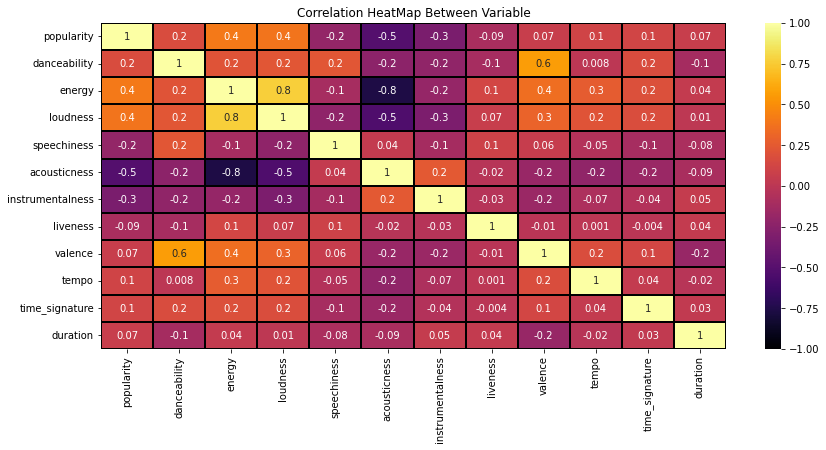

In [23]:
corr_df=df_tracks.drop(["key","mode","explicit"],axis=1).corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_df,annot=True,fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="Black")
heatmap.set_title("Correlation HeatMap Between Variable")

In [27]:
sample_df = df_tracks.sample(int(0.004*len(df_tracks)))
len(sample_df)

426

[Text(0.5, 1.0, 'Loudness vs Energy Crrelatoin')]

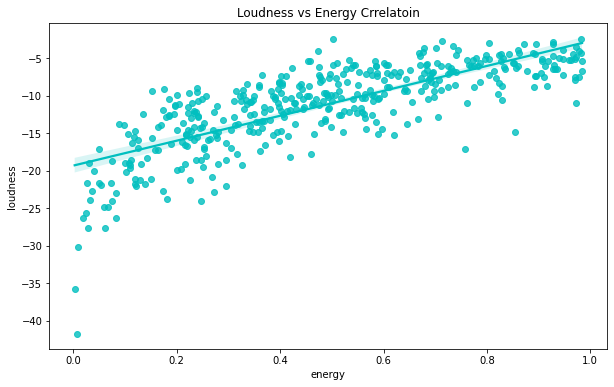

In [29]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample_df, y="loudness", x="energy", color="c").set(title="Loudness vs Energy Crrelatoin")

[Text(0.5, 1.0, 'Popularity vs Acousticness Crrelatoin')]

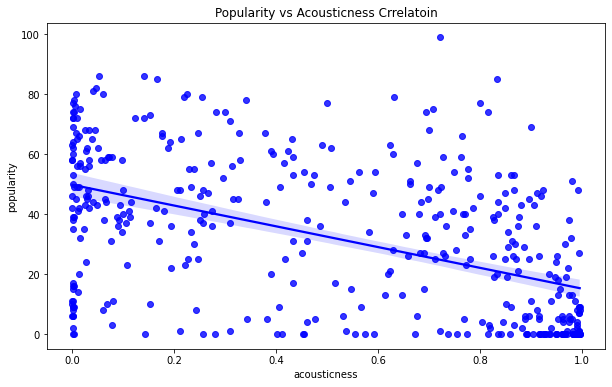

In [30]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample_df, y="popularity", x="acousticness", color="b").set(title="Popularity vs Acousticness Crrelatoin")

In [31]:
df_tracks['dates']=df_tracks.index.get_level_values('release_date')
df_tracks.dates=pd.to_datetime(df_tracks.dates)
years=df_tracks.dates.dt.year

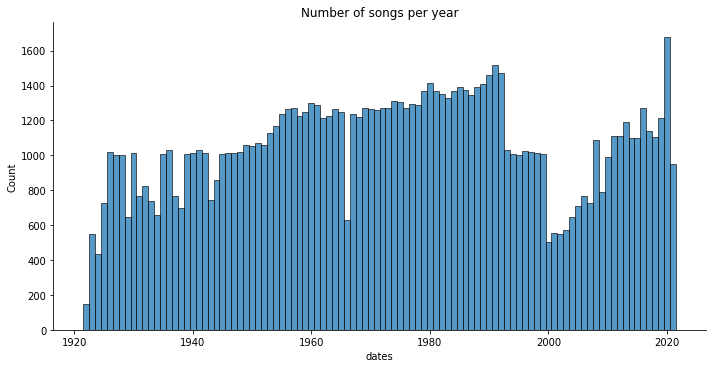

In [34]:
sns.displot(years,discrete=True,aspect=2,height=5,kind="hist").set(title="Number of songs per year")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text major ticklabel objects>)

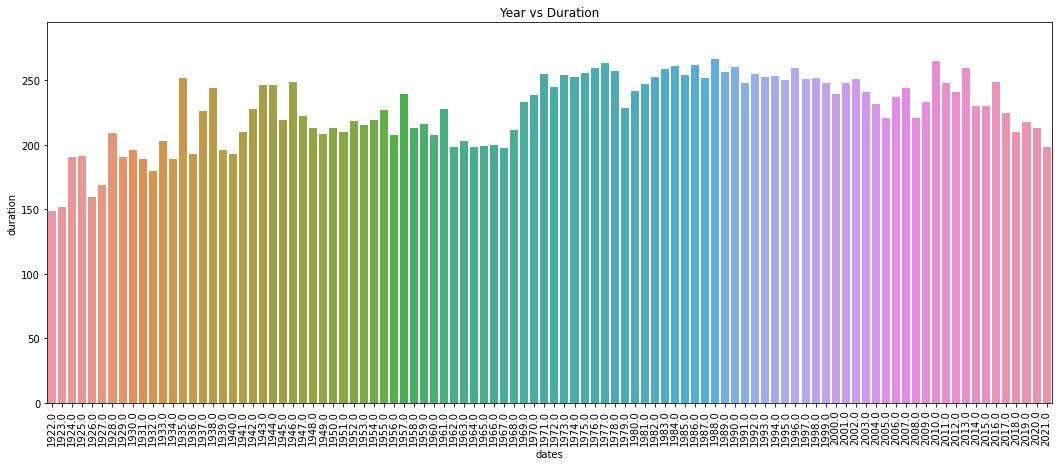

In [39]:
total_dr = df_tracks.duration
fig_dims = (18,7)
fig, ax = plt.subplots(figsize = fig_dims)
fig = sns.barplot (x=years, y=total_dr, ax=ax, errwidth=False).set(title="Year vs Duration")
plt.xticks(rotation=90)

In [47]:
df_genre.head(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.00000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,0.00000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,0.00000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.00000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,0.12300,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.00000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.358
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,0.00000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.533
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,0.00000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.274
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.00086,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.765
9,Movie,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,0.00125,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.718


Text(0, 0.5, 'Genres')

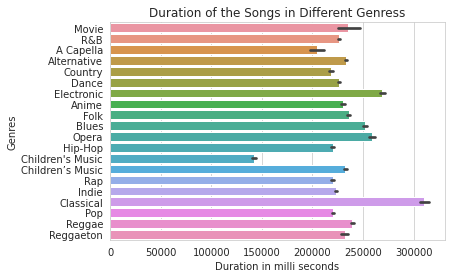

In [54]:
plt.title("Duration of the Songs in Different Genress")
sns.color_palette("rocket", as_cmap=True)
sns.barplot(y='genre', x='duration_ms', data=df_genre)
plt.xlabel("Duration in milli seconds")
plt.ylabel("Genres")

[Text(0.5, 1.0, 'Top 5 Genres by Popularity')]

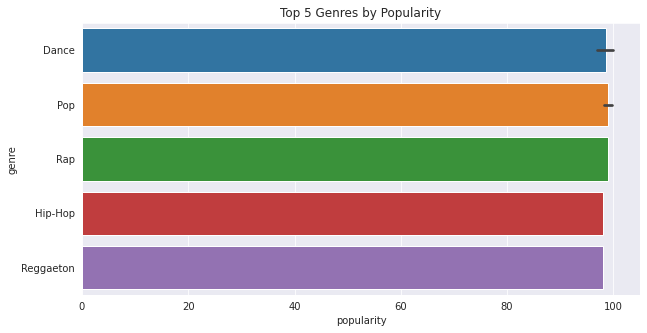

In [57]:
sns.set_style(style = "darkgrid")
plt.figure(figsize=(10,5))
famous = df_genre.sort_values("popularity", ascending=False).head(10)
sns.barplot(y='genre', x='popularity', data=famous).set(title="Top 5 Genres by Popularity")